## Web Scraping

* We can import the datas that are locally. But what if our data is online?
* Web Scraping is a process of finding and extracting data from internet within short time.

#### Why Scraping web?

* Price comparison
* Academic Research
* Gather hotel restaurant reviews and ratings from sites like Trip advisor 
* Use sites like booking.com & Hotels.com to scrape hotel room price and information.
* When we need more data for our Machine Learning Algorithms

#### Tools and libraries 

* BeautifulSoup
* Scrapy
* Selenium
* Splinter

#### Steps in scraping

* First step is go to our desired site by making HTTP request and download the response we got.
* Once we get response, we need to parse HTML data into useful text using Beautiful Soup library
* After we extracted our data, we can store it in list, dictionaries or dataframes etc.

## 1. Use Splinter and/or Beautiful Soup to scrape mercadolibre.com.mx or soundcloud.com or tripadvisor.com. You must programmatically click a link from the front page to go to another page of interest to you and then select at least 5 items from that page. The 5 items must be stored in a data structure that makes sense (dictionary, list, etc).

In [1]:
# we are using requests library to send requests to web and catch their response
import requests
# using Beautiful Soup library to parse HTML data into useful data
from bs4 import BeautifulSoup
# since we need to click a link programmatically, I am using splinter tool
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import time

In [11]:
# specifying path
executable_path = {'executable_path':ChromeDriverManager().install()} # every time we need to install to open chrome browser
# creating an object to Browser
browser = Browser('chrome',**executable_path,headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Codergirl\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [37]:
url = 'https://soundcloud.com/'
# we are asking our chrome browser to open our given url 
browser.visit(url)
# using beautiful soup to parse HTML data
soup = BeautifulSoup(browser.html,'html.parser')
# Now soundcloud page opened in chrome
# To go to another page from front page, I have to click explore trending playlists. From HTML code, I have found an
# attribute called "/home" to go to next page.

#<a>button-large sc-button-cta sc-button-primary" href="/home"> Explore trending playlists</a>

# browser is opening next page
browser.links.find_by_partial_href('/home').click()

# I can see the next page in my browser

In [62]:
# using full XPath,finding "Rap" on web page
# /html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[1]/div/div[1]/h2

rap = browser.find_by_xpath('/html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[4]/div/div[1]/h2').text
rap

'Rap'

In [ ]:
# similarly I am checking other titles too. Everything is same path except li[i] this one. So i am looping through to 
# print first few titles from that page

#/html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[1]/div/div[1]/h2
#/html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[2]/div/div[1]/h2
#/html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[3]/div/div[1]/h2

* I have indicated in the below screenshot what I am trying to print.

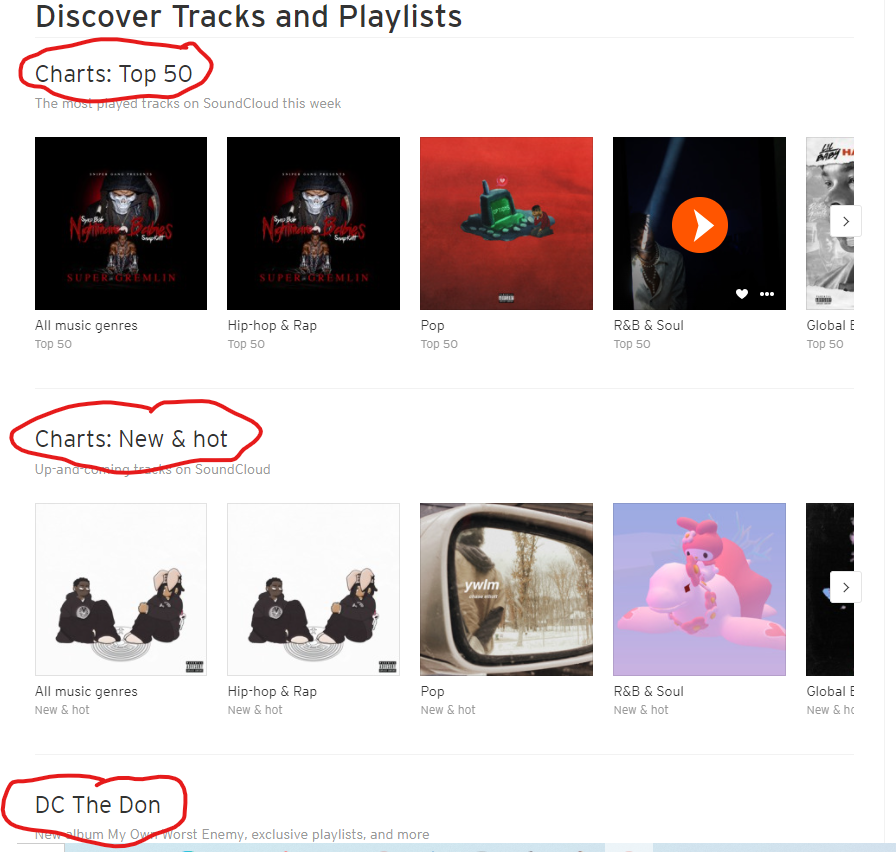

In [64]:
# loop through to print first few tracks and stored in a list
music_list = []
for i in range(1,9):
    rap = browser.find_by_xpath(f'/html/body/div[1]/div[2]/div[2]/div/div/div[1]/div[3]/div/ul/li[{i}]/div/div[1]/h2').text
    music_list.append(rap)
print(music_list)

['Charts: Top 50', 'Charts: New & hot', 'DC The Don', 'Rap', 'New Music Now', 'Emo Rap & More', 'Party Music', 'Trap']


## 2. Share with your group how web scraping worked on the website and link you chose. Compare it with others. List the site you chose and two observations about parsing the website. Indicate if this was the same or different for the sites chosen by others.

* In our group, we explored all 3 web pages and decided to take soundcloud.com.
* So I chose soundcloud web page. I have decided to print first few tracks and playlists name. 
* I tried mostly all methods to find an element from splinter documentation. 

    * browser.find_by_css('h1')
    * browser.find_by_xpath('//h1')
    * browser.find_by_tag('h1')
    * browser.find_by_name('name')
    * browser.find_by_text('Hello World!')
    
* In selenium, we can use id, name as a locator to find Web Elements accurately. But in some cases, the id is generated dynamically and the name is also not provided. So XPath and CSS(Cascading Style Sheet) selectors are the most efficient way to locate web elements in such scenarios. 

* So we have decided to find the element using it xpath. I did right click on the element and I inspected in HTML page. I asked my browser to find the element based on its full x_path.

* When we were discussing in slack, one group used xpath like us, other used regular expression to find an element.

* I included the other methods I have used to parse the web.

In [28]:
# using css selector
divs = browser.find_by_css('h1').text
divs

'Discover Tracks and Playlists'

In [30]:
# using tag
tag = browser.find_by_tag('h2').text
tag

'Charts: Top 50'

In [36]:
all_divs = browser.find_by_tag('div').text
all_divs

"SoundCloud\nHome\nStream\nLibrary\nSearch\nSign in\nCreate account\nUpload\nSettings and more\nDiscover Tracks and Playlists\nCharts: Top 50\nThe most played tracks on SoundCloud this week\nAll music genres\nTop 50\nHip-hop & Rap\nTop 50\nPop\nTop 50\nR&B & Soul\nTop 50\nGlobal Beats\nTop 50\nforward\nCharts: New & hot\nUp-and-coming tracks on SoundCloud\nAll music genres\nNew & hot\nHip-hop & Rap\nNew & hot\nPop\nNew & hot\nR&B & Soul\nNew & hot\nGlobal Beats\nNew & hot\nforward\nRap\nThe latest and hottest rap\nTomorrow's Rap Hits: The Lookout\nHustle: Rap & Hip-Hop\nBest Rap Right Now: Drippin'\nHustle: Rap & Hip-Hop\nFeel-Good Hip-Hop: Boomin'\nHustle: Rap & Hip-Hop\nPlay\nLike\nFollow Hustle: Rap & Hip-Hop\nMore\nNew Plugg Music\nHustle: Rap & Hip-Hop\nLight, Breezy Rap: Gloss\nHustle: Rap & Hip-Hop\nforward\nNew Music Now\nThe latest hits, updated all the time\nBest Rap Right Now: Drippin'\nHustle: Rap & Hip-Hop\nFresh Pop Picks: Ear Candy\nShine: Pop\nFresh Pressed Tracks\nFres